# Sensitivity Experiments evaluating the role of wind and buoyancy fluxes on the AMOC

## Part 1 - Preparation

### 1.1 Tech Preamble

In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy 
import cartopy.crs as ccrs
import warnings
warnings.filterwarnings("ignore")

### 1.2 Load Data

In [2]:
ref_amoc_pat = '../shared_materials/Data/ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K003.hindcast_1m_19580101_20161231_diaptr.nc'
ref_psi_pat = '../shared_materials/Data/ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K003.hindcast_1m_19580101_20161231_psi.nc'
thc_amoc_pat = '../shared_materials/Data/ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K004.thermhal90_1m_19580101_20181231_diaptr.nc'
thc_psi_pat = '../shared_materials/Data/ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K004.thermhal90_1m_19580101_20161231_psi.nc'
wind_amoc_pat = '../shared_materials/Data/ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K005.wind90_1m_19580101_20161231_diaptr.nc'
wind_psi_pat = '../shared_materials/Data/ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K005.wind90_1m_19580101_20161231_psi.nc'
clim_amoc_pat = '../shared_materials/Data/ORCA025.L46.LIM2vp.JRA.XIOS2-KPW001.RYF90_1m_19580101_20161231_diaptr.nc'
clim_psi_pat = '../shared_materials/Data/ORCA025.L46.LIM2vp.JRA.XIOS2-KPW001.RYF90_1m_19580101_20161231_psi.nc'

In [3]:
ref_amoc = xr.open_dataset(ref_amoc_pat)
ref_psi = xr.open_dataset(ref_psi_pat)
thc_amoc = xr.open_dataset(thc_amoc_pat)
thc_psi = xr.open_dataset(thc_psi_pat)
wind_amoc = xr.open_dataset(wind_amoc_pat)
wind_psi = xr.open_dataset(wind_psi_pat)
clim_amoc = xr.open_dataset(clim_amoc_pat)
clim_psi = xr.open_dataset(clim_psi_pat)

In [4]:
#Set lat, lon as coordinates

ref_psi = ref_psi.set_coords(('nav_lon', 'nav_lat'))
thc_psi = thc_psi.set_coords(('nav_lon', 'nav_lat'))
wind_psi = wind_psi.set_coords(('nav_lon', 'nav_lat'))
clim_psi = clim_psi.set_coords(('nav_lon', 'nav_lat'))

### 1.3 Take Time Mean

In [5]:
#Nur einmal ausfuehren!!
wind_amoc_mean = wind_amoc.mean('time_counter')
thc_amoc_mean = thc_amoc.mean('time_counter')
clim_amoc_mean = clim_amoc.mean('time_counter')
ref_amoc_mean = ref_amoc.mean('time_counter')

### 1.4 Creating a mask - which semi - worked - can definately be improved

In [6]:
mask = clim_amoc_mean.zomsfatl == 0

# mask = wind_amoc.zomsfatl.where(wind_amoc.zomsfatl = 0, wind_amoc.zomsfatl, 
# mask = np.ma.masked_where(wind_amoc.zomsfatl == 0, wind_amoc.zomsfatl)
# xr.plot(mask)

# plt.imshow(mask, cmap ='gray')
# xr.where(wind_amoc.zomsfatl == 0, 1, np.NaN).plot(cmap = 'Greys')
# foo = np.ma.where(wind_amoc == 0, wind_amoc, np.NaN)
# plt.plot(wind_amoc.zomsfatl.isel(x = 0));

# mask.size
# ax, fig = plt.subplots()
# mask.isel(x = 0, y = range(1020)).plot.pcolormesh(x = 'nav_lat', y = 'depthw', ax = ax)
# mask.where(mask == False, mask,  np.NaN)

# mask.where(mask == False, np.nan)

# mask

## Part 2 - Plotting

### 2.1 Plot Time Means

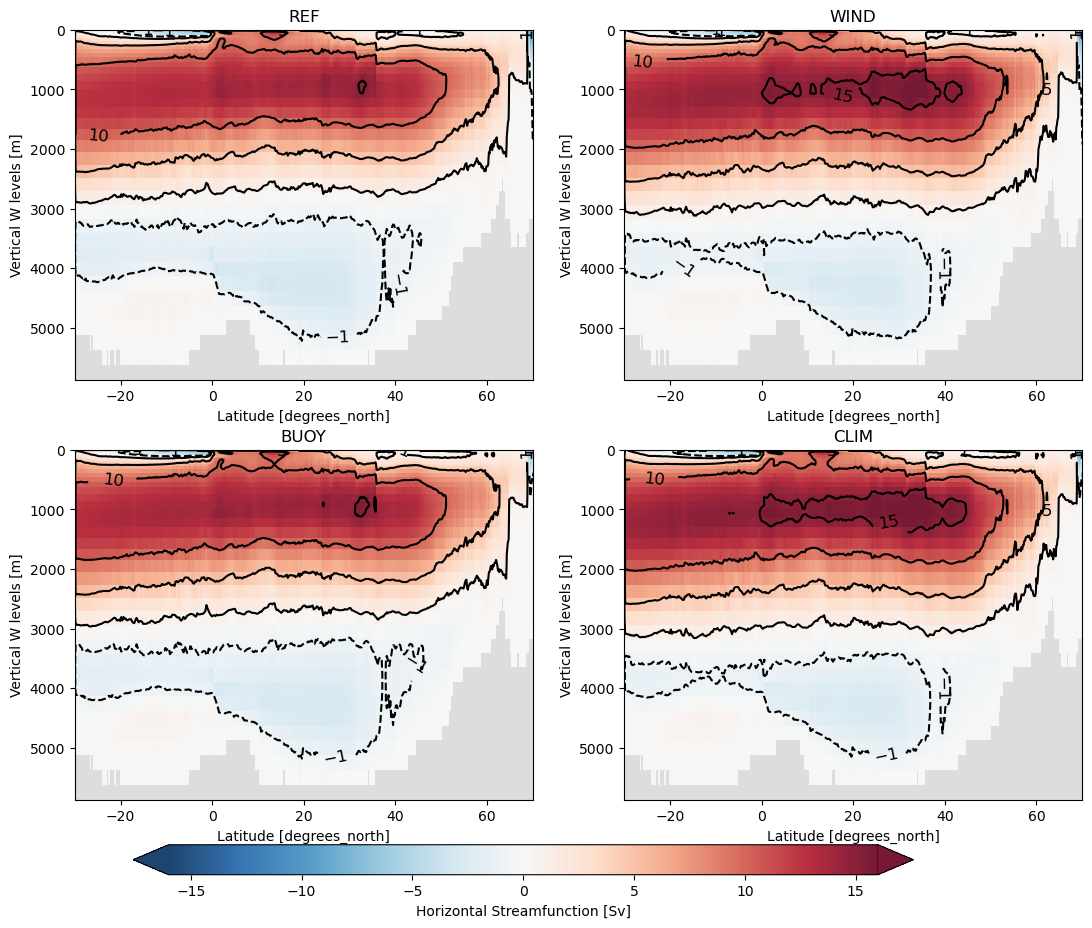

In [7]:
amoc_list = [ref_amoc_mean, wind_amoc_mean, thc_amoc_mean, clim_amoc_mean]
title_list = ['REF', 'WIND', 'BUOY', 'CLIM']
fig, ax = plt.subplots(2,2, figsize = (13, 10))
levels1 = [1, 5, 10, 15];
levels2 = [-1 ]

for i, ax in enumerate(fig.axes):
    
    mask.isel(x = 0, y = range(1020)).plot.pcolormesh(x = 'nav_lat', y = 'depthw', ax = ax, add_colorbar = False, cmap = 'Greys', alpha=1)
    p = amoc_list[i]['zomsfatl'].isel(x = 0, y = range(1020)).plot.pcolormesh(x = 'nav_lat', y = 'depthw', ax = ax, add_colorbar = False, vmax = 16, alpha = 0.9)
    contour1 = amoc_list[i]['zomsfatl'].isel(x = 0, y = range(1020)).plot.contour(x = 'nav_lat', y = 'depthw', ax = ax, cmap = 'k', levels = levels1, clabel = True)
    contour2 = amoc_list[i]['zomsfatl'].isel(x = 0, y = range(1020)).plot.contour(x = 'nav_lat', y = 'depthw', ax = ax, cmap = 'k', levels = levels2)
    plt.clabel(contour1, inline=True, fontsize=12)
    plt.clabel(contour2, inline=True, fontsize=12)

    
    
    ax.invert_yaxis()
    ax.set_xlim((-30,70))
    ax.set_title(title_list[i]);

cbar_ax = fig.add_axes([0.17, 0.035, 0.6, 0.03])
cb = fig.colorbar(p, cax = cbar_ax, orientation = 'horizontal', extend = 'both')
cbar_ax.set_xlabel('Horizontal Streamfunction [Sv]');

plt.savefig('overview.png')

#### 2.1.1 Plot Difference betweeen Runs - REF

In [8]:
amoc_list = [wind_amoc_mean-ref_amoc_mean, thc_amoc_mean-ref_amoc_mean, clim_amoc_mean-ref_amoc_mean]
title_list = ['WIND-REF', 'THC-REF', 'CLIM-REF']
levels1 = [.25, 1]
levels2 = [-.1]

fig, ax = plt.subplots(3,1, figsize = (12, 15))

for i, ax in enumerate(fig.axes):
    
    mask.isel(x = 0, y = range(1020)).plot.pcolormesh(x = 'nav_lat', y = 'depthw', ax = ax, add_colorbar = False, cmap = 'Greys', alpha=1)
    p = amoc_list[i]['zomsfatl'].isel(x = 0, y = range(1020)).plot.pcolormesh(x = 'nav_lat', y = 'depthw', ax = ax, add_colorbar = False, vmax = 3, alpha = .9)
    contour1 = amoc_list[i]['zomsfatl'].isel(x = 0, y = range(1020)).plot.contour(x = 'nav_lat', y = 'depthw', ax = ax, cmap = 'k', levels = levels1, clabel = True)
    contour2 = amoc_list[i]['zomsfatl'].isel(x = 0, y = range(1020)).plot.contour(x = 'nav_lat', y = 'depthw', ax = ax, cmap = 'k', levels = levels2)
    plt.clabel(contour1, inline=True, fontsize=12)
    plt.clabel(contour2, inline=True, fontsize=12)

    
    
    ax.invert_yaxis()
    ax.set_xlim((-30,70)) #-30,70
    # ax.set_ylim((100, 0)) 
    ax.set_title(title_list[i]);


cbar_ax = fig.add_axes([0.17, 0.02, 0.6, 0.03])
cb = fig.colorbar(p, cax = cbar_ax, orientation = 'horizontal', extend = 'both')
cbar_ax.set_xlabel('horizontal streamfunction');

plt.close()

#### 2.1.2 Plot Difference between Runs - CLIM 

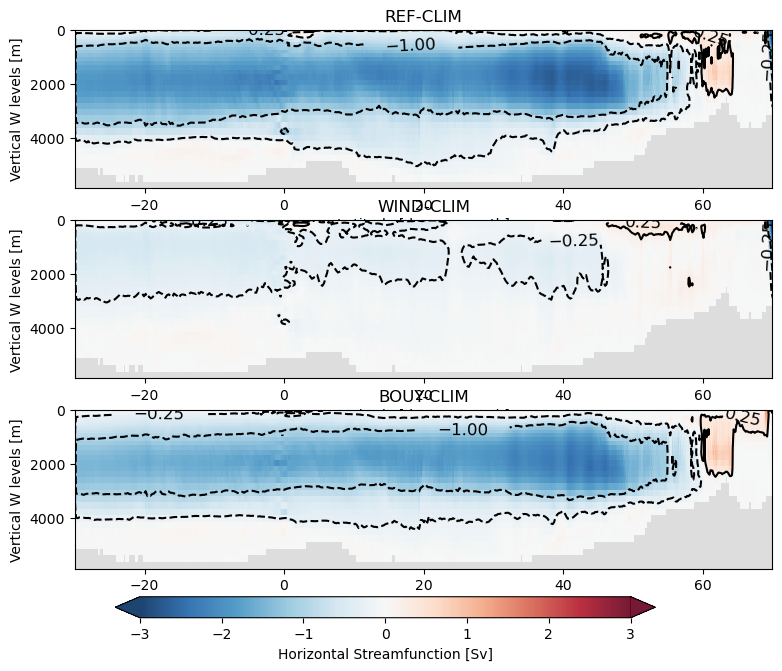

In [13]:
amoc_list = [ref_amoc_mean-clim_amoc_mean, wind_amoc_mean-clim_amoc_mean, thc_amoc_mean-clim_amoc_mean]
title_list = ['REF-CLIM', 'WIND-CLIM', 'BOUY-CLIM']
fig, ax = plt.subplots(3,1, figsize = (9,7))
levels1 = [.25]
levels2 = [-.25,-1]


for i, ax in enumerate(fig.axes):
    
    mask.isel(x = 0, y = range(1020)).plot.pcolormesh(x = 'nav_lat', y = 'depthw', ax = ax, add_colorbar = False, cmap = 'Greys', alpha=1)
    p = amoc_list[i]['zomsfatl'].isel(x = 0, y = range(1020)).plot.pcolormesh(x = 'nav_lat', y = 'depthw', ax = ax, add_colorbar = False, vmax = 3, alpha = .9)
    contour1 = amoc_list[i]['zomsfatl'].isel(x = 0, y = range(1020)).plot.contour(x = 'nav_lat', y = 'depthw', ax = ax, cmap = 'k', levels = levels1, clabel = True)
    contour2 = amoc_list[i]['zomsfatl'].isel(x = 0, y = range(1020)).plot.contour(x = 'nav_lat', y = 'depthw', ax = ax, cmap = 'k', levels = levels2)
    plt.clabel(contour1, inline=True, fontsize=12)
    plt.clabel(contour2, inline=True, fontsize=12)

    
    ax.invert_yaxis()
    ax.set_xlim((-30,70)) #-30,70
    # ax.set_ylim((100, 0)) 
    ax.set_title(title_list[i]);


cbar_ax = fig.add_axes([0.17, 0.04, 0.6, 0.03])
cb = fig.colorbar(p, cax = cbar_ax, orientation = 'horizontal', extend = 'both')
cbar_ax.set_xlabel('Horizontal Streamfunction [Sv]');

# plt.tight_layout()
plt.savefig('minus_clim.png')

### 2.2. Time series showing the interannual to decadal Variability

#### 2.2.1 Gulf Stream 

In [10]:
from matplotlib.patches import Rectangle

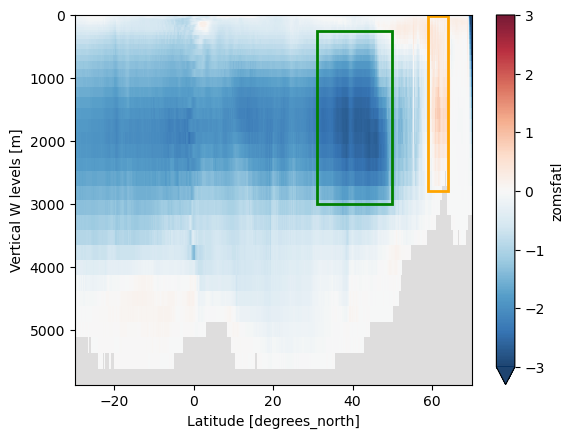

In [11]:

#Plot

x_start = 31
x_end = 50
y_start = 250
y_end = 3000

width = x_end - x_start
height = y_end - y_start

rect1 = Rectangle((x_start, y_start), width, height, linewidth=2, edgecolor='green', facecolor='none')


x_start = 59
x_end = 64
y_start = 20
y_end = 2800

width = x_end - x_start
height = y_end - y_start

rect2 = Rectangle((x_start, y_start), width, height, linewidth=2, edgecolor='orange', facecolor='none')



foo = ref_amoc_mean - clim_amoc_mean;

fig, ax = plt.subplots(1,1)
mask.isel(x = 0, y = range(1020)).plot.pcolormesh(x = 'nav_lat', y = 'depthw', ax = ax, add_colorbar = False, cmap = 'Greys', alpha=1)
foo['zomsfatl'].isel(x = 0, y = range(1020)).plot.pcolormesh(x = 'nav_lat', y = 'depthw', ax = ax, add_colorbar = True, vmax = 3, alpha = .9)
ax.invert_yaxis()
ax.set_xlim((-30,70)) #-30,70 
ax.add_patch(rect1);
ax.add_patch(rect2);

In [12]:
x_start = 31
x_end = 50
y_start = 250
y_end = 3000

width = x_end - x_start
height = y_end - y_start

rect1 = Rectangle((x_start, y_start), width, height, linewidth=2, edgecolor='green', facecolor='none')



In [13]:
#Take Spatial mean over the box

i = np.where((ref_amoc['nav_lat'] > x_start) & (ref_amoc['nav_lat'] < x_end))

ref_amoc_gs = ref_amoc.sel(y=slice(min(i[0]), max(i[0])), depthw=slice(200, 3000))
ref_amoc_gs = ref_amoc_gs.mean(dim=['y', 'depthw'])

wind_amoc_gs = wind_amoc.sel(y=slice(min(i[0]), max(i[0])), depthw=slice(200, 3000))
wind_amoc_gs = wind_amoc_gs.mean(dim=['y', 'depthw'])

thc_amoc_gs = thc_amoc.sel(y=slice(min(i[0]), max(i[0])), depthw=slice(200, 3000))
thc_amoc_gs = thc_amoc_gs.mean(dim=['y', 'depthw'])

clim_amoc_gs = clim_amoc.sel(y=slice(min(i[0]), max(i[0])), depthw=slice(200, 3000))
clim_amoc_gs = clim_amoc_gs.mean(dim=['y', 'depthw'])

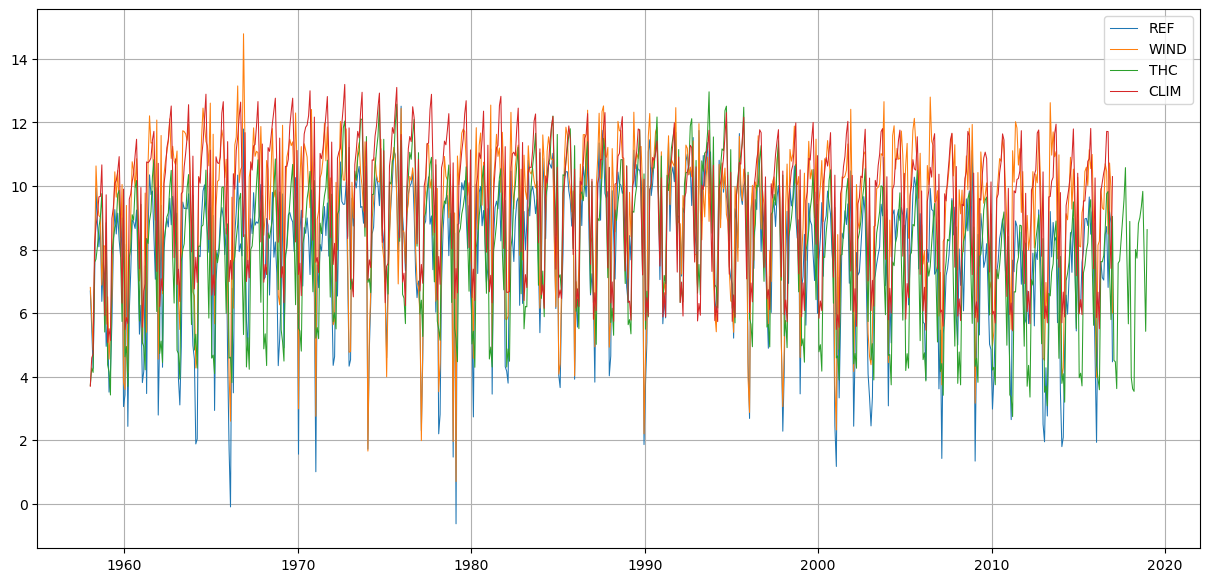

In [14]:
n = .75;

fig, ax = plt.subplots(1,1, figsize = (15, 7))

plt.plot(ref_amoc_gs.time_counter, ref_amoc_gs['zomsfatl'].isel(x = 0), label = 'REF', linewidth = n)
plt.plot(ref_amoc_gs.time_counter, wind_amoc_gs['zomsfatl'].isel(x = 0), label = 'WIND', linewidth = n)
plt.plot(thc_amoc_gs.time_counter, thc_amoc_gs['zomsfatl'].isel(x = 0), label = 'THC', linewidth = n)
plt.plot(ref_amoc_gs.time_counter, clim_amoc_gs['zomsfatl'].isel(x = 0), label = 'CLIM', linewidth = n)
plt.legend()
plt.grid()


In [15]:
def moving_average(x, w): #wwindowsize in months
    return np.convolve(x, np.ones(w), 'valid') / w

In [16]:
ref_amoc_gs_filt = moving_average(ref_amoc_gs['zomsfatl'].isel(x = 0), 12)
wind_amoc_gs_filt = moving_average(wind_amoc_gs['zomsfatl'].isel(x = 0), 12)
thc_amoc_gs_filt = moving_average(thc_amoc_gs['zomsfatl'].isel(x = 0), 12)
clim_amoc_gs_filt = moving_average(clim_amoc_gs['zomsfatl'].isel(x = 0), 12)

Text(0.5, 1.0, 'Gulf Stream - AMOC - 12 month rolling mean')

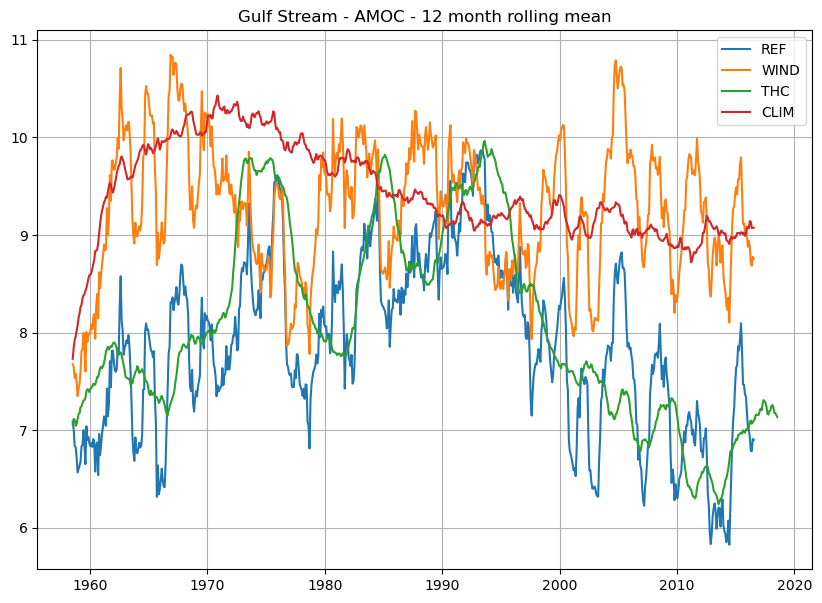

In [17]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(1,1,1)

ax.plot(ref_amoc_gs.time_counter[6:-5], ref_amoc_gs_filt , label = 'REF')
ax.plot(wind_amoc_gs.time_counter[6:-5], wind_amoc_gs_filt , label = 'WIND')
ax.plot(thc_amoc_gs.time_counter[6:-5], thc_amoc_gs_filt , label = 'THC')
ax.plot(clim_amoc_gs.time_counter[6:-5], clim_amoc_gs_filt , label = 'CLIM')
ax.legend()
ax.grid()
ax.set_title('Gulf Stream - AMOC - 12 month rolling mean')

#### 2.2.2 Labrador Sea

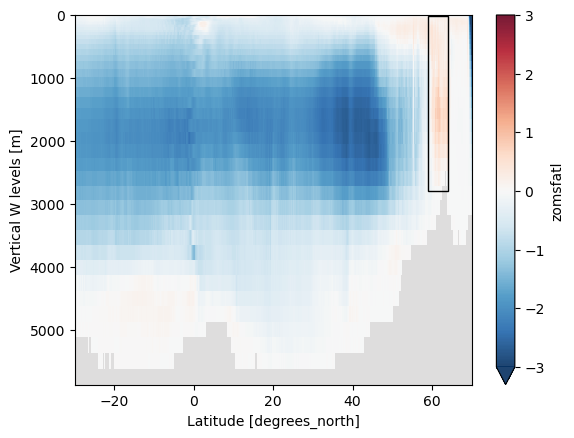

In [18]:
# Select Box

x_start = 59
x_end = 64
y_start = 20
y_end = 2800

width = x_end - x_start
height = y_end - y_start

rect = Rectangle((x_start, y_start), width, height, linewidth=1, edgecolor='k', facecolor='none')

#Plot
foo = ref_amoc_mean - clim_amoc_mean;

fig, ax = plt.subplots(1,1)
mask.isel(x = 0, y = range(1020)).plot.pcolormesh(x = 'nav_lat', y = 'depthw', ax = ax, add_colorbar = False, cmap = 'Greys', alpha=1)
foo['zomsfatl'].isel(x = 0, y = range(1020)).plot.pcolormesh(x = 'nav_lat', y = 'depthw', ax = ax, add_colorbar = True, vmax = 3, alpha = .9)
ax.invert_yaxis()
ax.set_xlim((-30,70)) #-30,70 
ax.add_patch(rect);

In [19]:
lab_x = (-60, -40)#_boxmin, x_boxmax = -80, -65 #lon limits

x_start = 40
x_end = 60

In [20]:
#Take Spatial mean over the box

i = np.where((ref_amoc['nav_lat'] > x_start) & (ref_amoc['nav_lat'] < x_end))

ref_amoc_lab = ref_amoc.sel(y=slice(min(i[0]), max(i[0])), depthw=slice(200, 3000))
# ref_amoc_lab = ref_amoc_lab.mean(dim=['y'])

wind_amoc_lab = wind_amoc.sel(y=slice(min(i[0]), max(i[0])), depthw=slice(200, 3000))
# wind_amoc_lab = wind_amoc_lab.mean(dim=['y'])

thc_amoc_lab = thc_amoc.sel(y=slice(min(i[0]), max(i[0])), depthw=slice(200, 3000))
# thc_amoc_lab = thc_amoc_lab.mean(dim=['y'])

clim_amoc_lab = clim_amoc.sel(y=slice(min(i[0]), max(i[0])), depthw=slice(200, 3000))
# clim_amoc_lab = clim_amoc_lab.mean(dim=['y'])

In [21]:
clim_amoc_lab['zomsfatl']

<xarray.DataArray 'zomsfatl' (time_counter: 708, depthw: 20, y: 119, x: 1)>
array([[[[ 0.782002],
         ...,
         [ 2.065942]],

        ...,

        [[-3.441214],
         ...,
         [-0.134928]]],


       ...,


       [[[ 5.313927],
         ...,
         [-1.496853]],

        ...,

        [[ 4.967601],
         ...,
         [-0.090619]]]], dtype=float32)
Coordinates:
    nav_lat        (y, x) float32 ...
    nav_lon        (y, x) float32 ...
  * depthw         (depthw) float32 208.6 248.3 295.4 ... 2.597e+03 2.824e+03
    time_centered  (time_counter) datetime64[ns] ...
  * time_counter   (time_counter) datetime64[ns] 1958-01-16T12:00:00 ... 2016...
Dimensions without coordinates: y, x
Attributes:
    long_name:           Meridional Stream-Function: Atlantic
    units:               Sv
    online_operation:    average
    interval_operation:  1350 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 1350 s)

In [22]:
dst = clim_amoc_lab['zomsfatl'].isel(time_counter = 403)

ind_xm = np.zeros(dst.shape[0]-1, dtype = 'int')
ind_ym = np.arange(dst.shape[0]-1)
strf_val = np.zeros(dst.shape[0]-1)

for i in range(dst.shape[0]-1):#iterate over latitudes in box
    #find large >5sv differences between gridpoints 
    diffs = np.ediff1d(dst.isel(y = i).where(dst.isel(y = i)< -0.5e7).values)
    
    if np.size(np.where(diffs > 0)[0]) > 0: 
        ind_xm[i] = np.where(diffs > 0)[0][0] #index of westernmost large difference       
    else: #in case of no large differences just take max. value
        ind_xm[i] = np.nanargmin(np.ediff1d(dst.isel(y = i))) 
            
    strf_val[i] = dst.isel(x = ind_xm[i], depthw = ind_ym[i]).values 

strf_ind = np.argmin(strf_val)
strf_max_9 = dst.isel(x = slice(ind_xm[strf_ind]-2, ind_xm[strf_ind]+3),
                           y = slice(strf_ind-2, strf_ind+3))

IndexError: index 16 is out of bounds for axis 1 with size 1

In [ ]:
strf_max_9


In [ ]:
strf_max_9.sel(x=0)

In [ ]:
#for plots
lat_max = dst.coords['nav_lat'].values[ind_ym,ind_xm]
lon_max = dst.coords['nav_lon'].values[ind_ym,ind_xm]

streamf_list = [dst]
title_list = ['REF snapshot']
#calling GeoAxes

fig, ax = plt.subplots(1,1, figsize = (9,10))

p = (streamf_list[0]/1e6).plot.pcolormesh(x = 'nav_lon',y = 'nav_lat', transform = proj, ax = ax,
                            cmap = cm.balance, cbar_kwargs = cb_kwargs)
streamf_list[0].plot.contour(x = 'nav_lon',y = 'nav_lat', ax = ax,  transform = proj, levels = [0], cmap = black_cmap)

strf_max_9.plot.pcolormesh(x = 'nav_lon',y = 'nav_lat', transform = proj,  ax = ax,
                            cmap = ListedColormap(['yellow']), add_colorbar = False,  alpha = .5)
ax.plot(lab_x_list,lab_y_list, lw = 3, color = 'tab:orange',label = 'Lab. Sea box')

#plot_max points
ax.scatter(lon_max,lat_max, marker = 'x', color = 'red', label = 'potential western minimum')
ax.scatter(0,0,marker = 's', c ='yellow',label = 'chosen minimum area')
gl = ax.gridlines(draw_labels = True, alpha = 0.5)
gl.top_labels = False
gl.right_labels = False
    
ax.add_feature(cfeature.LAND,facecolor='gray', edgecolor = '00', zorder = 6)
ax.set_extent((-65,-35,45,65))
ax.legend(loc = 'lower right')
ax.set_title('snapshot Lab. Sea')
#plt.savefig('pics/snap_labsea', dpi = 300, bbox_inches = 'tight')

In [ ]:
ref_amoc_lab_filt = moving_average(ref_amoc_lab['zomsfatl'].isel(x = 0), 12)
wind_amoc_lab_filt = moving_average(wind_amoc_lab['zomsfatl'].isel(x = 0), 12)
thc_amoc_lab_filt = moving_average(thc_amoc_lab['zomsfatl'].isel(x = 0), 12)
clim_amoc_lab_filt = moving_average(clim_amoc_lab['zomsfatl'].isel(x = 0), 12)

In [ ]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(1,1,1)

ax.plot(ref_amoc_lab.time_counter[6:-5], ref_amoc_lab_filt , label = 'REF')
ax.plot(wind_amoc_lab.time_counter[6:-5], wind_amoc_lab_filt , label = 'WIND')
ax.plot(thc_amoc_lab.time_counter[6:-5], thc_amoc_lab_filt , label = 'THC')
ax.plot(clim_amoc_lab.time_counter[6:-5], clim_amoc_lab_filt , label = 'CLIM')
ax.legend()
ax.grid()
ax.set_title('Labrador Sea - AMOC - 12 month rolling mean')

In [ ]:
n = .75;

fig, ax = plt.subplots(1,1, figsize = (15, 7))

plt.plot(ref_amoc_lab.time_counter, ref_amoc_lab['zomsfatl'].isel(x = 0), label = 'REF', linewidth = n)
plt.plot(ref_amoc_lab.time_counter, wind_amoc_lab['zomsfatl'].isel(x = 0), label = 'WIND', linewidth = n)
plt.plot(thc_amoc_lab.time_counter, thc_amoc_lab['zomsfatl'].isel(x = 0), label = 'THC', linewidth = n)
plt.plot(ref_amoc_lab.time_counter, clim_amoc_lab['zomsfatl'].isel(x = 0), label = 'CLIM', linewidth = n)
plt.legend()
plt.grid()